In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
import conceptnet_lite

conceptnet_lite.connect("data/conceptnet.db")
from conceptnet_lite import Label, edges_for

In [3]:
import mutual_info as mi
#from mutual_info import *
#len(mi.nearest_distances(texto1.T,k=3))


In [130]:
def encontrar_relaciones(maalign):
    antonyms=[]
    colum=maalign.columns
    borrar=[]
    borrar_i=[]
    for index,strings in maalign.iterrows():
        for c in colum:
            try:
                wt=str(index).split("{")[1].split(",")[0]
                wh=str(c).split("{")[1].split(",")[0]
                #print("buscar en conceptnet",wt,wh)
                for e in edges_for(Label.get(text=wh, language='en').concepts, same_language=True):
                    if "synonym"==e.relation.name:
                        if wh== e.start.text:
                            if e.end.text==wt:
                                #print("sinonimos conceptnet",wh,wt)
                                #synonyms.append(wt)
                                #relaciones_fuertes.append((wt,wh,wt,wh,1,0))
                                borrar.append(c)
                                borrar_i.append(index)
                                bandera_concept=1
                                break
                        else:
                            if e.start.text==wt:
                                #print("sinonimos conceptnet",wh,wt)
                                #synonyms.append(wt)
                                #relaciones_fuertes.append((wt,wh,wt,wh,1,0))
                                borrar.append(c)
                                borrar_i.append(index)
                                bandera_concept=1
                                break
                    elif "antonym" ==e.relation.name:
                        if wh== e.start.text:
                            if e.end.text==wt:
                                #print("antonimos conceptnet",wh,wt)
                                bandera_concept=1
                                antonyms.append(wt)
                                break
                    elif "is_a" ==e.relation.name:
                        if wh== e.start.text:
                            if e.end.text==wt:
                                #print("is a  conceptnet",wh,wt)
                                bandera_concept=1
                                borrar.append(c)
                                borrar_i.append(index)
                                #relaciones_fuertes.append((wt,wh,wt,wh,1,0))
                                #is_a.append(wt)
                                break
                        else:
                            if e.start.text==wt:
                                #print("isa  conceptnet",wh,wt)
                                bandera_concept=1
                                borrar.append(c)
                                borrar_i.append(index)
                                #relaciones_fuertes.append((wt,wh,wt,wh,1,0))
                                #is_a.append(wt)
                                break
            except:
                a=0
    #            print("no esta en conceptnet:",wh)
    #print("Columnas macheadas",borrar)
    #print("Columnas macheadas",borrar_i)
    #print("Antonimos",antonyms)
    return borrar,borrar_i,antonyms

In [4]:
dfp=pd.read_pickle("data/prueba2_T.pickle")
dfp

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Input1,Input2,Model1,Model2
0,0,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, we...","[NULL{null,PROPN}, a{a,DET}, person{person,NOU...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[54.419086, 0.26434264, 19.101225, 1.2564747,...","[0.03256245, 0.9674213, 1.6298849e-05]","[1.0, 0.0, 0.0]","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404..."
1,1,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, dr...","[NULL{null,PROPN}, a{a,DET}, guy{guy,NOUN}, in...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[54.419086, 0.26434264, 15.958708, 1.2564747,...","[0.032293927, 0.9676897, 1.637127e-05]","[1.0, 0.0, 0.0]","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404..."
2,2,"[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[NULL{null,PROPN}, a{a,DET}, boy{boy,NOUN}, sl...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[54.419086, 0.26434264, 13.145995, 53.678085,...","[0.86936, 0.016950097, 0.113689914]","[0.0, 0.0, 1.0]","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404..."
3,3,"[NULL{null,NOUN}, an{an,DET}, asian{asian,ADJ}...","[NULL{null,PROPN}, nobody{nobody,NOUN}, is{be,...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[54.419086, 39.413757, 4.3888206, 17.930946, ...","[0.56929874, 0.4305042, 0.00019709245]","[0.0, 0.0, 1.0]","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404..."
4,4,"[NULL{null,PROPN}, a{a,DET}, child{child,NOUN}...","[NULL{null,PROPN}, the{the,DET}, child{child,N...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[54.419086, 0.0, 13.88712, 4.3888206, 1.63502...","[0.012144173, 0.9878521, 3.820453e-06]","[0.0, 1.0, 0.0]","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404..."
...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,"[NULL{null,PROPN}, a{a,DET}, group{group,NOUN}...","[NULL{null,PROPN}, a{a,DET}, bunch{bunch,NOUN}...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[54.419086, 0.26434264, 3.9083166, 0.06153027...","[0.0071587614, 0.99284124, 1.5131656e-08]","[1.0, 0.0, 0.0]","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404..."
96,96,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,ADJ}, woman{woman,NOUN}, holds{hold...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[54.419086, 13.22332, 7.2733583, 11.074403, 0...","[0.019462422, 0.98053336, 4.2487504e-06]","[1.0, 0.0, 0.0]","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404..."
97,97,"[NULL{null,PROPN}, a{a,DET}, skateboarding{ska...","[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, pa...","[[0.46309, 0.438

In [131]:
def obtener_distancia(num,dfp):
    texto_2_t=dfp.at[num,"Text"]
    hipotesis_2_t=dfp.at[num,"Hipotesis"]
    texto_2=dfp.at[num,"R_Text"]
    hipotesis_2=dfp.at[num,"R_Hip"]
    if len(texto_2_t) > 41 and len(hipotesis_2_t) > 41:
        max_t=41
        max_h=41
    elif len(texto_2_t) > 41:
        max_t=41
        max_h=len(hipotesis_2_t)
    elif len(hipotesis_2_t) > 41:
        max_h=41
        max_t=len(texto_2_t)
    else:
        max_t=len(texto_2_t)
        max_h=len(hipotesis_2_t)
    lista_l=[]
    for i in range(max_t):
        lista=[]
        for j in range(max_h):
            lista.append(np.linalg.norm(texto_2[i] - hipotesis_2[j]))#*wasserstein_distance(texto_2[i],hipotesis_2[j]))
        lista_l.append(lista)
    meartrh=pd.DataFrame(lista_l[:],index=texto_2_t[:max_t],columns=hipotesis_2_t[:max_h])
    col=meartrh.columns
    borrar=[]
    for c in col:
        if "{be,VERB" in str(c) or ("NOUN" not in str(c) and "VERB" not in str(c) and "ADJ" not in str(c) and "ADV" not in str(c)):
            borrar.append(c)        
    borrar_i=[]
    for index,strings in meartrh.iterrows():
        if "{be,VERB" in str(index) or ("NOUN" not in str(index) and "VERB" not in str(index) and "ADJ" not in str(index) and "ADV" not in str(index)):
            borrar_i.append(index)        
    meartrh=meartrh.drop(borrar,axis=1)
    meartrh=meartrh.drop(borrar_i,axis=0)
    return meartrh.min().sum()

In [6]:
obtener_distancia(2,dfp)

21.44141960144043

In [279]:
num=4

In [280]:
texto_2_t=dfp.at[num,"Text"]
hipotesis_2_t=dfp.at[num,"Hipotesis"]

In [281]:
texto_2=dfp.at[num,"R_Text"][:len(texto_2_t)]
hipotesis_2=dfp.at[num,"R_Hip"][:len(hipotesis_2_t)]

In [282]:
from scipy.stats import wasserstein_distance
lista_l=[]
lista_muinfor=[]
for i in range(len(texto_2)):
    lista=[]
    lista_mu=[]
    for j in range(len(hipotesis_2)):
        #lista.append()
        lista.append(wasserstein_distance(texto_2[i],hipotesis_2[j]))
        lista_mu.append(mi.mutual_information_2d(np.array(texto_2[i]),np.array(hipotesis_2[j])))
    lista_l.append(lista)
    lista_muinfor.append(lista_mu)
print(lista_l)

[[0.0, 0.19008815211666233, 0.08020218823881195, 0.1775682177426642, 0.16140678274503445, 0.08671844121922426, 0.15351576059979072, 0.19008815211666233, 0.05986579852498835, 0.15115383563408002], [0.14834371000567137, 0.043891933305079275, 0.0830695415090304, 0.03418254807872775, 0.024505374192376667, 0.07508806559373624, 0.03322409135095467, 0.043891933305079275, 0.09137285773671464, 0.02293595313288581], [0.08020218823881195, 0.12036977648691691, 0.0, 0.10856170185696101, 0.09265287483518479, 0.0402823770069517, 0.08593330307165159, 0.12036977648691691, 0.03593013265315671, 0.0909132596850395], [0.15720896474939455, 0.04066822837538288, 0.08736436379840597, 0.03234842489560834, 0.028707856196172894, 0.08221165459603068, 0.029253624348590777, 0.04066822837538288, 0.10056427274743322, 0.0317498613311909], [0.14834371000567137, 0.043891933305079275, 0.0830695415090304, 0.03418254807872775, 0.024505374192376667, 0.07508806559373624, 0.03322409135095467, 0.043891933305079275, 0.0913728577

In [283]:
meartrh=pd.DataFrame(lista_l[:],index=texto_2_t,columns=hipotesis_2_t)
meartrh

,"NULL{null,PROPN}","the{the,DET}","child{child,NOUN}","is{be,VERB}","getting{get,VERB}","wet{wet,NOUN}","from{from,ADP}","the{the,DET}","fountain{fountain,NOUN}",".{.,PUNCT}"
"NULL{null,PROPN}",0.000000,0.190088,0.080202,0.177568,0.161407,0.086718,0.153516,0.190088,0.059866,0.151154
"a{a,DET}",0.148344,0.043892,0.083070,0.034183,0.024505,0.075088,0.033224,0.043892,0.091373,0.022936
"child{child,NOUN}",0.080202,0.120370,0.000000,0.108562,0.092653,0.040282,0.085933,0.120370,0.035930,0.090913
"in{in,ADP}",0.157209,0.040668,0.087364,0.032348,0.028708,0.082212,0.029254,0.040668,0.100564,0.031750
"a{a,DET}",0.148344,0.043892,0.083070,0.034183,0.024505,0.075088,0.033224,0.043892,0.091373,0.022936
"maroon{maroon,ADJ}",0.074602,0.123027,0.034633,0.111154,0.090948,0.032780,0.085188,0.123027,0.024583,0.086076
"shirt{shirt,NOUN}",0.081864,0.125727,0.032901,0.112817,0.092457,0.025922,0.090336,0.125727,0.033148,0.091426
"playing{play,VERB}",0.105730,0.093860,0.049204,0.083474,0.059995,0.046515,0.056199,0.093860,0.050459,0.060019
"next{next,ADV}",0.165917,0.032421,0.097333,0.035703,0.015734,0.092878,0.025525,0.032421,0.106745,0.025714
"to{to,ADP}",0.181752,0.026487,0.116125,0.036188,0.036366,0.114929,0.033965,0.026487,0.124687,0.035432


In [284]:
col=meartrh.columns
borrar=[]
for c in col:
    if "{be,VERB" in str(c) or ("NOUN" not in str(c) and "VERB" not in str(c) and "ADJ" not in str(c) and "ADV" not in str(c)):
        borrar.append(c)        
borrar

['NULL{null,PROPN}',
 'the{the,DET}',
 'is{be,VERB}',
 'from{from,ADP}',
 'the{the,DET}',
 '.{.,PUNCT}']

In [285]:
borrar_i=[]
for index,strings in meartrh.iterrows():
    if "{be,VERB" in str(index) or ("NOUN" not in str(index) and "VERB" not in str(index) and "ADJ" not in str(index) and "ADV" not in str(index)):
        borrar_i.append(index)        
borrar_i

['NULL{null,PROPN}',
 'a{a,DET}',
 'in{in,ADP}',
 'a{a,DET}',
 'to{to,ADP}',
 'a{a,DET}',
 '.{.,PUNCT}']

In [286]:
meartrh=meartrh.drop(borrar,axis=1)
meartrh=meartrh.drop(borrar_i,axis=0)
#meartrh=meartrh.drop("is{be,VERB}",axis=0)
meartrh

,"child{child,NOUN}","getting{get,VERB}","wet{wet,NOUN}","fountain{fountain,NOUN}"
"child{child,NOUN}",0.000000,0.092653,0.040282,0.035930
"maroon{maroon,ADJ}",0.034633,0.090948,0.032780,0.024583
"shirt{shirt,NOUN}",0.032901,0.092457,0.025922,0.033148
"playing{play,VERB}",0.049204,0.059995,0.046515,0.050459
"next{next,ADV}",0.097333,0.015734,0.092878,0.106745
"fountain{fountain,NOUN}",0.035930,0.102449,0.039280,0.000000


In [287]:
meartrh.idxmax()

child{child,NOUN}                   next{next,ADV}
getting{get,VERB}          fountain{fountain,NOUN}
wet{wet,NOUN}                       next{next,ADV}
fountain{fountain,NOUN}             next{next,ADV}
dtype: object

In [288]:
meartrh.min().sum()

0.04165652627775368

In [289]:
meartrh.sum().sum()

1.2327605265489543

# Para normalizar vectores

In [18]:
#norms = np.linalg.norm(texto_2, axis=-1, keepdims=True)
#norms = np.where(norms == 0, 1, norms)
#print(texto_2 / norms)

In [19]:
#ma_2=np.dot(texto_2,texto_2.T)
#ma_2

In [20]:
#madt=pd.DataFrame(ma_2)
#madt

In [21]:
#madt.min()

# Lectura de matriz de alineamiento

In [18]:
df = pd.read_pickle("data/prueba100.pickle")
df

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label
0,0,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, we...","[NULL{null,PROPN}, a{a,DET}, person{person,NOU...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.060492776, 0.7027438, 0.20296031...","[0.4928643, 0.50155383, 0.0055818837]","[1.0, 0.0, 0.0]"
1,1,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, dr...","[NULL{null,PROPN}, a{a,DET}, guy{guy,NOUN}, in...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.060492776, 0.64837056, 0.2029603...","[0.4695498, 0.3973312, 0.13311893]","[1.0, 0.0, 0.0]"
2,2,"[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[NULL{null,PROPN}, a{a,DET}, boy{boy,NOUN}, sl...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.060492776, 0.4078711, 2.2245083,...","[1.4341879e-06, 8.787866e-05, 0.9999107]","[0.0, 0.0, 1.0]"
3,3,"[NULL{null,NOUN}, an{an,DET}, asian{asian,ADJ}...","[NULL{null,PROPN}, nobody{nobody,NOUN}, is{be,...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 1.9305927, 0.10360007, 0.8346571, ...","[0.033964496, 0.008023773, 0.9580117]","[0.0, 0.0, 1.0]"
4,4,"[NULL{null,PROPN}, a{a,DET}, child{child,NOUN}...","[NULL{null,PROPN}, the{the,DET}, child{child,N...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.033035405, 0.5160244, 0.10360007...","[0.0027733932, 0.9895504, 0.0076761814]","[0.0, 1.0, 0.0]"
...,...,...,...,...,...,...,...,...
95,95,"[NULL{null,PROPN}, a{a,DET}, group{group,NOUN}...","[NULL{null,PROPN}, a{a,DET}, bunch{bunch,NOUN}...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.060492776, 0.41359743, 0.0717519...","[0.8000752, 0.17865694, 0.021267932]","[1.0, 0.0, 0.0]"
96,96,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,ADJ}, woman{woman,NOUN}, holds{hold...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.475788, 0.8695118, 0.72379255, 0...","[0.7528739, 0.18234292, 0.06478321]","[1.0, 0.0, 0.0]"
97,97,"[NULL{null,PROPN}, a{a,DET}, skateboarding{ska...","[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, pa...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.060492776, 0.43997452, 1.9583746...","[7.513892e-05, 0.0013085654, 0.99861634]","[0.0, 0.0, 1.0]"
98,98,"[NULL{null,ADJ}, four{four,NUM}, children{chil...","[NULL{null,PROPN}, the{the,DET}, children{chil...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.033035405, 0.44769567, 0.0726737...","[0.034316223, 0.83774996, 0.12793382]","[0.0, 0.0, 1.0]"


In [290]:
indice=4

In [291]:
t=pd.DataFrame(df.at[indice,"Text"])
h=pd.DataFrame(df.at[indice,"Hipotesis"])
print(len(t))
print(len(h))

13
10


In [292]:
texto1=pd.DataFrame(df.at[indice,"R_Text"])
hipotesis1=pd.DataFrame(df.at[indice,"R_Hip"])

In [308]:
t

,0
0,"NULL{null,PROPN}"
1,"a{a,DET}"
2,"child{child,NOUN}"
3,"in{in,ADP}"
4,"a{a,DET}"
5,"maroon{maroon,ADJ}"
6,"shirt{shirt,NOUN}"
7,"playing{play,VERB}"
8,"next{next,ADV}"
9,"to{to,ADP}"


In [309]:
h

,0
0,"NULL{null,PROPN}"
1,"the{the,DET}"
2,"child{child,NOUN}"
3,"is{be,VERB}"
4,"getting{get,VERB}"
5,"wet{wet,NOUN}"
6,"from{from,ADP}"
7,"the{the,DET}"
8,"fountain{fountain,NOUN}"
9,".{.,PUNCT}"


# Comparar con concatenación y suma las tuplas alineadas en intrasentence

In [318]:
texto1=df.at[indice,"R_Text"]
hipotesis1=df.at[indice,"R_Hip"]

In [324]:
texto1[11]

array([ 7.31455609e-02,  2.65603010e-02,  3.06837894e-02, -9.45993662e-02,
       -1.35853719e-02, -1.42971072e-02,  1.05859675e-02,  9.91642326e-02,
       -9.60402004e-03,  1.78390294e-01, -2.29574833e-02, -5.19371144e-02,
        3.13406158e-03, -2.84918770e-02, -7.65628414e-04, -1.32771572e-02,
       -8.41529965e-02,  2.06473708e-01,  3.14633027e-02, -1.59239117e-02,
        1.04092676e-02,  5.56386774e-03, -7.68964924e-03, -1.90344825e-02,
        4.09805439e-02, -5.77453114e-02, -1.84868779e-02,  2.70375833e-02,
       -3.18942033e-02,  3.56735699e-02,  6.80749817e-03,  2.93910839e-02,
       -4.97841053e-02,  3.28637324e-02, -1.16077131e-02, -3.78909186e-02,
        4.15042080e-02, -9.68735740e-02,  6.49270043e-02, -5.15226694e-03,
       -7.07456749e-03,  7.62680992e-02,  8.95691942e-03, -1.73213482e-02,
        2.57388931e-02,  1.04574449e-02, -1.13988452e-01, -1.06959365e-01,
       -1.05983857e-02, -3.69827321e-04, -5.35948910e-02,  6.10907841e-03,
       -2.92728841e-02,  

In [251]:
texto1[2].shape

(300,)

In [328]:
fontain=np.mean((texto1[11],texto1[2]),axis=0)
len(fontain)

300

In [329]:
wetf=np.mean((hipotesis1[8],hipotesis1[5]),axis=0)
len(wetf)

300

In [330]:
np.dot(fontain,wetf)

0.40066826

In [272]:
shirtlees_man=np.concatenate((texto1[1],texto1[2]))
#shirtlees_man=(texto1[1]+texto1[2])/2
len(shirtlees_man)

600

In [275]:
smokes_cigarette=np.concatenate((texto1[7],texto1[9]))
#shirtlees_man=(texto1[1]+texto1[2])/2
len(smokes_cigarette)

600

In [267]:
shirt_man=(hipotesis1[2]+hipotesis1[7])/2
len(shirt_man)

300

In [271]:
not_wearing=np.concatenate((hipotesis1[4],hipotesis1[5]))
#not_wearing=(hipotesis1[4]+hipotesis1[5])/2
len(not_wearing)

600

In [260]:
np.dot(shirtlees_man,shirt_man)

0.7647307

In [268]:
np.dot(shirtlees_man,shirt_man)

0.34426036

In [270]:
np.dot(shirtlees_man,not_wearing)

0.33060628

In [273]:
np.dot(shirtlees_man,not_wearing)

0.8784484

In [278]:
np.dot(not_wearing,-1*smokes_cigarette)

-0.4349668

In [ ]:
shirtlees_manC=np.concatenate(texto1[1].values+np.array(texto1[2].values))

## Comparación intrasentence

In [294]:
maTexto=pd.DataFrame(np.dot(texto1[1:len(t)],texto1[1:len(t)].T),index=t[1:],columns=t[1:])
maTexto

,"(a{a,DET},)","(child{child,NOUN},)","(in{in,ADP},)","(a{a,DET},)","(maroon{maroon,ADJ},)","(shirt{shirt,NOUN},)","(playing{play,VERB},)","(next{next,ADV},)","(to{to,ADP},)","(a{a,DET},)","(fountain{fountain,NOUN},)","(.{.,PUNCT},)"
"(a{a,DET},)",1.000000,0.395472,0.454527,1.000000,0.114632,0.266668,0.327973,0.495689,0.505892,1.000000,0.245613,0.291600
"(child{child,NOUN},)",0.395472,1.000000,0.332690,0.395472,0.090822,0.214158,0.274601,0.353080,0.401760,0.395472,0.143708,0.261569
"(in{in,ADP},)",0.454527,0.332690,1.000000,0.454527,0.050158,0.171070,0.325592,0.437826,0.471923,0.454527,0.194855,0.300469
"(a{a,DET},)",1.000000,0.395472,0.454527,1.000000,0.114632,0.266668,0.327973,0.495689,0.505892,1.000000,0.245613,0.291600
"(maroon{maroon,ADJ},)",0.114632,0.090822,0.050158,0.114632,1.000001,0.454116,0.048698,0.068707,0.014956,0.114632,0.135726,0.090673
"(shirt{shirt,NOUN},)",0.266668,0.214158,0.171070,0.266668,0.454116,1.000000,0.229041,0.260263,0.191875,0.266668,0.142237,0.218576
"(playing{play,VERB},)",0.327973,0.274601,0.325592,0.327973,0.048698,0.229041,1.000000,0.350165,0.259833,0.327973,0.146186,0.249423
"(next{next,ADV},)",0.495689,0.353080,0.437826,0.495689,0.068707,0.260263,0.350165,1.000001,0.509918,0.495689,0.179694,0.348170
"(to{to,ADP},)",0.505892,0.401760,0.471923,0.505892,0.014956,0.191875,0.259833,0.509918,1.000000,0.505892,0.157662,0.358275
"(a{a,DET},)",1.000000,0.395472,0.454527,1.000000,0.114632,0.266668,0.327973,0.495689,0.505892,1.000000,0.245613,0.291600


In [295]:
maHipotesis=pd.DataFrame(np.dot(hipotesis1[1:len(h)],hipotesis1[1:len(h)].T),index=h[1:],columns=h[1:])
maHipotesis

,"(the{the,DET},)","(child{child,NOUN},)","(is{be,VERB},)","(getting{get,VERB},)","(wet{wet,NOUN},)","(from{from,ADP},)","(the{the,DET},)","(fountain{fountain,NOUN},)","(.{.,PUNCT},)"
"(the{the,DET},)",1.000000,0.356418,0.553611,0.427420,0.277771,0.489423,1.000000,0.258244,0.311352
"(child{child,NOUN},)",0.356418,1.000000,0.386440,0.358259,0.199049,0.296287,0.356418,0.143708,0.261569
"(is{be,VERB},)",0.553611,0.386440,1.000000,0.452887,0.237249,0.368237,0.553611,0.233714,0.381103
"(getting{get,VERB},)",0.427420,0.358259,0.452887,1.000000,0.441898,0.395281,0.427420,0.165309,0.331161
"(wet{wet,NOUN},)",0.277771,0.199049,0.237249,0.441898,1.000000,0.217718,0.277771,0.259916,0.262965
"(from{from,ADP},)",0.489423,0.296287,0.368237,0.395281,0.217718,1.000000,0.489423,0.149354,0.273883
"(the{the,DET},)",1.000000,0.356418,0.553611,0.427420,0.277771,0.489423,1.000000,0.258244,0.311352
"(fountain{fountain,NOUN},)",0.258244,0.143708,0.233714,0.165309,0.259916,0.149354,0.258244,1.000000,0.138824
"(.{.,PUNCT},)",0.311352,0.261569,0.381103,0.331161,0.262965,0.273883,0.311352,0.138824,1.000001


In [296]:
dt_temp=pd.DataFrame(np.triu(maTexto.values,k=1),index=t[1:],columns=t[1:])

In [297]:
dh_temp=pd.DataFrame(np.triu(maHipotesis.values,k=1),index=h[1:],columns=h[1:])

In [298]:
h

,0
0,"NULL{null,PROPN}"
1,"the{the,DET}"
2,"child{child,NOUN}"
3,"is{be,VERB}"
4,"getting{get,VERB}"
5,"wet{wet,NOUN}"
6,"from{from,ADP}"
7,"the{the,DET}"
8,"fountain{fountain,NOUN}"
9,".{.,PUNCT}"


In [304]:
col=dt_temp.columns
borrar=[]
for c in col:
    if "{be,VERB" in str(c) or ("NOUN" not in str(c) and "VERB" not in str(c) and "ADJ" not in str(c) and "ADV" not in str(c)):
        borrar.append(c)        
borrar_i=[]
for index,strings in dt_temp.iterrows():
    if "{be,VERB" in str(index) or ("NOUN" not in str(index) and "VERB" not in str(index) and "ADJ" not in str(index) and "ADV" not in str(index)):
        borrar_i.append(index)        

In [300]:
col=dh_temp.columns
borrar=[]
for c in col:
    if "{be,VERB" in str(c) or ("NOUN" not in str(c) and "VERB" not in str(c) and "ADJ" not in str(c) and "ADV" not in str(c)):
        borrar.append(c)        
borrar_i=[]
for index,strings in dh_temp.iterrows():
    if "{be,VERB" in str(index) or ("NOUN" not in str(index) and "VERB" not in str(index) and "ADJ" not in str(index) and "ADV" not in str(index)):
        borrar_i.append(index) 

In [305]:
dt_temp=dt_temp.drop(borrar,axis=1)
dt_temp=dt_temp.drop(borrar_i,axis=0)
dt_temp


,"(child{child,NOUN},)","(maroon{maroon,ADJ},)","(shirt{shirt,NOUN},)","(playing{play,VERB},)","(next{next,ADV},)","(fountain{fountain,NOUN},)"
"(child{child,NOUN},)",0.0,0.090822,0.214158,0.274601,0.353080,0.143708
"(maroon{maroon,ADJ},)",0.0,0.000000,0.454116,0.048698,0.068707,0.135726
"(shirt{shirt,NOUN},)",0.0,0.000000,0.000000,0.229041,0.260263,0.142237
"(playing{play,VERB},)",0.0,0.000000,0.000000,0.000000,0.350165,0.146186
"(next{next,ADV},)",0.0,0.000000,0.000000,0.000000,0.000000,0.179694
"(fountain{fountain,NOUN},)",0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [303]:
dh_temp=dh_temp.drop(borrar,axis=1)
dh_temp=dh_temp.drop(borrar_i,axis=0)
dh_temp

,"(child{child,NOUN},)","(getting{get,VERB},)","(wet{wet,NOUN},)","(fountain{fountain,NOUN},)"
"(child{child,NOUN},)",0.0,0.358259,0.199049,0.143708
"(getting{get,VERB},)",0.0,0.000000,0.441898,0.165309
"(wet{wet,NOUN},)",0.0,0.000000,0.000000,0.259916
"(fountain{fountain,NOUN},)",0.0,0.000000,0.000000,0.000000


In [306]:
dh_temp.T.idxmax()

(child{child,NOUN},)                (getting{get,VERB},)
(getting{get,VERB},)                    (wet{wet,NOUN},)
(wet{wet,NOUN},)              (fountain{fountain,NOUN},)
(fountain{fountain,NOUN},)          (child{child,NOUN},)
dtype: object

In [307]:
dt_temp.T.idxmax()

(child{child,NOUN},)                   (next{next,ADV},)
(maroon{maroon,ADJ},)               (shirt{shirt,NOUN},)
(shirt{shirt,NOUN},)                   (next{next,ADV},)
(playing{play,VERB},)                  (next{next,ADV},)
(next{next,ADV},)             (fountain{fountain,NOUN},)
(fountain{fountain,NOUN},)          (child{child,NOUN},)
dtype: object

In [174]:
#ma=pd.DataFrame(df.at[indice,"M_Align"][1:len(t)+1,1:len(h)+1],columns=h,index=t)
ma=pd.DataFrame(np.dot(texto1[1:len(t)],hipotesis1[1:len(h)].T),index=t[1:],columns=h[1:])
#ma=pd.DataFrame(np.dot(hipotesis1[1:len(h)],hipotesis1[1:len(h)].T),index=h[1:],columns=h[1:])
ma

,"(the{the,DET},)","(man{man,NOUN},)","(is{be,VERB},)","(not{not,ADV},)","(wearing{wear,VERB},)","(a{a,DET},)","(shirt{shirt,NOUN},)","(.{.,PUNCT},)"
"(a{a,DET},)",0.592583,0.436561,0.635047,0.487730,0.342317,1.000000,0.266668,0.291600
"(shirtless{shirtless,ADJ},)",0.041032,0.345643,0.054721,0.101660,0.390718,0.093211,0.328169,0.003749
"(man{man,NOUN},)",0.386911,1.000000,0.463613,0.481821,0.433081,0.436561,0.381750,0.347673
"(with{with,ADP},)",0.545023,0.361984,0.457023,0.487811,0.343595,0.555268,0.223550,0.363602
"(cropped{crop,VERB},)",0.082439,0.122384,0.103094,0.174630,0.384195,0.133089,0.464895,0.088501
"(hair{hair,NOUN},)",0.262644,0.359900,0.274219,0.322509,0.494147,0.257297,0.407242,0.275378
"(smokes{smoke,VERB},)",0.030141,0.296495,0.136641,0.170888,0.280895,0.101000,0.213945,0.034813
"(a{a,DET},)",0.592583,0.436561,0.635047,0.487730,0.342317,1.000000,0.266668,0.291600
"(cigarette{cigarette,NOUN},)",0.177995,0.260687,0.163339,0.230994,0.264079,0.233902,0.252512,0.137747
"(and{and,CCONJ},)",0.562488,0.344095,0.458148,0.530426,0.284769,0.399397,0.239884,0.432417


In [175]:
col=ma.columns
borrar=[]
for c in col:
    if ("NOUN" not in str(c) and "VERB" not in str(c) and "ADJ" not in str(c) and "ADV" not in str(c)) or "be,VERB" in str(c) :
        borrar.append(c)        
borrar

[('the{the,DET}',), ('is{be,VERB}',), ('a{a,DET}',), ('.{.,PUNCT}',)]

In [176]:
borrar_i=[]
for index,strings in ma.iterrows():
    lema_i=str(index).split("{")[1].split(",")[0]
    if ("NOUN" not in str(index) and "VERB" not in str(index) and "ADJ" not in str(index) and "ADV" not in str(index)) or "be,VERB" in str(index) :
        borrar_i.append(index)      
    for c in col:
        if index==c:
            borrar_i.append(index)
            borrar.append(c)
        if strings[c]>=1:
            borrar_i.append(index)
            borrar.append(c)
        lema_c=str(c).split("{")[1].split(",")[0]
        if lema_i == lema_c:
            borrar_i.append(index)
            borrar.append(c)
borrar_i

[('a{a,DET}',),
 ('a{a,DET}',),
 ('a{a,DET}',),
 ('a{a,DET}',),
 ('man{man,NOUN}',),
 ('man{man,NOUN}',),
 ('with{with,ADP}',),
 ('a{a,DET}',),
 ('a{a,DET}',),
 ('a{a,DET}',),
 ('a{a,DET}',),
 ('and{and,CCONJ}',),
 ('a{a,DET}',),
 ('a{a,DET}',),
 ('a{a,DET}',),
 ('a{a,DET}',),
 ('.{.,PUNCT}',),
 ('.{.,PUNCT}',),
 ('.{.,PUNCT}',),
 ('.{.,PUNCT}',)]

In [177]:
ma=ma.drop(borrar,axis=1)
ma=ma.drop(borrar_i,axis=0)
ma

,"(not{not,ADV},)","(wearing{wear,VERB},)","(shirt{shirt,NOUN},)"
"(shirtless{shirtless,ADJ},)",0.101660,0.390718,0.328169
"(cropped{crop,VERB},)",0.174630,0.384195,0.464895
"(hair{hair,NOUN},)",0.322509,0.494147,0.407242
"(smokes{smoke,VERB},)",0.170888,0.280895,0.213945
"(cigarette{cigarette,NOUN},)",0.230994,0.264079,0.252512
"(ties{tie,NOUN},)",0.292791,0.363732,0.360798
"(plastic{plastic,ADJ},)",0.271415,0.353059,0.266849
"(bag{bag,NOUN},)",0.266534,0.405231,0.465901


In [179]:
ma.T.idxmax()

(shirtless{shirtless,ADJ},)     (wearing{wear,VERB},)
(cropped{crop,VERB},)            (shirt{shirt,NOUN},)
(hair{hair,NOUN},)              (wearing{wear,VERB},)
(smokes{smoke,VERB},)           (wearing{wear,VERB},)
(cigarette{cigarette,NOUN},)    (wearing{wear,VERB},)
(ties{tie,NOUN},)               (wearing{wear,VERB},)
(plastic{plastic,ADJ},)         (wearing{wear,VERB},)
(bag{bag,NOUN},)                 (shirt{shirt,NOUN},)
dtype: object

In [178]:
print(ma.idxmax())

(not{not,ADV},)          (hair{hair,NOUN},)
(wearing{wear,VERB},)    (hair{hair,NOUN},)
(shirt{shirt,NOUN},)       (bag{bag,NOUN},)
dtype: object


In [120]:
ma.sum().sum()/ma.shape[0]

1.207685037092729

<AxesSubplot:>

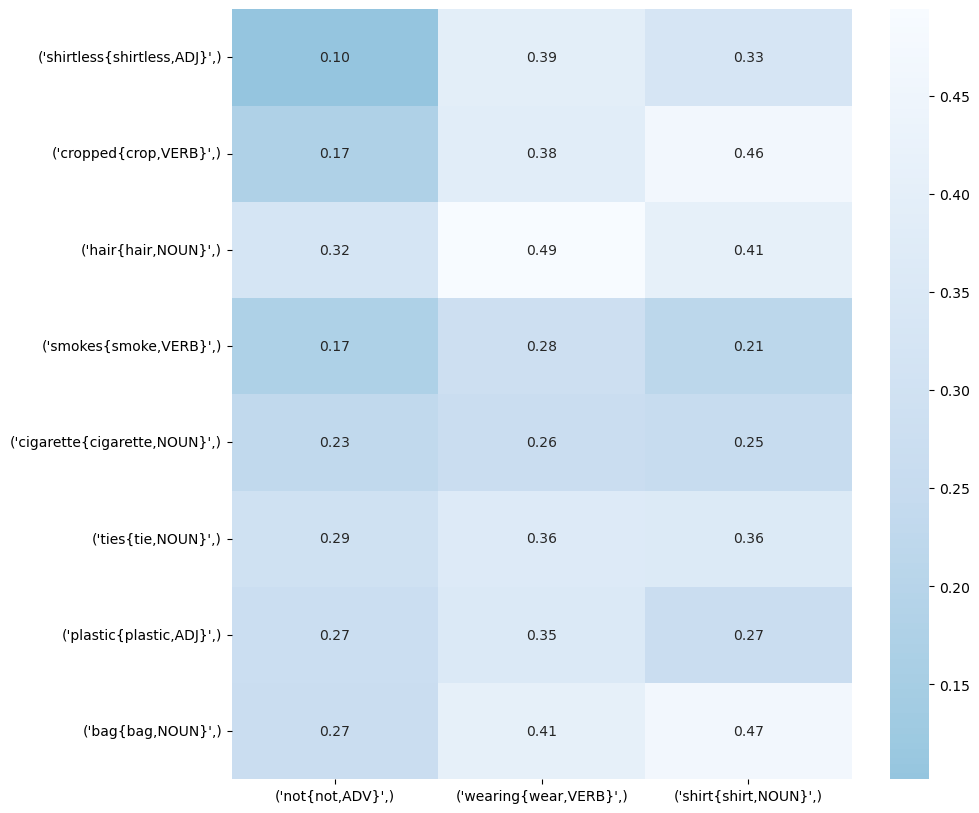

In [219]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(ma, center=0, cmap='Blues_r', annot=True, fmt='.2f')

In [28]:
ma.max().sum()

1.1646037

In [29]:
ma.index

Index([  ('little{little,ADJ}',),     ('black{black,ADJ}',),
               ('red{red,ADJ}',), ('striped{striped,ADJ}',),
          ('shirt{shirt,NOUN}',),     ('walks{walk,VERB}',),
         ('grassy{grassy,ADJ}',),      ('hill{hill,NOUN}',)],
      dtype='object')

# Checar cuant suma la información por clase

In [30]:
prueba=pd.read_csv("data/prueba.csv")

In [31]:
prueba

,Unnamed: 0,Unnamed: 0.1,gold_label,sentence1,sentence2,SET
0,568111,558275,entailment,"A man wearing a blue shirt, black apron, eyegl...",A person in appropriate institution protection...,TEST
1,568812,558976,entailment,A man dressed in a red shirt and black tie sta...,a guy in a red top and tie makes a speech,TEST
2,560781,550939,contradiction,A young boy runs across a road in front of a s...,A boy sleeps in his bed.,TEST
3,565799,555963,contradiction,An Asian woman is standing on a path with a ba...,Nobody is standing,TEST
4,562665,552829,neutral,A child in a maroon shirt playing next to a fo...,The child is getting wet from the fountain.,TEST
...,...,...,...,...,...,...
95,567068,557232,entailment,"A group of men in blue shirts, banded hats, an...",a bunch of guys in colorful clothes stand toge...,TEST
96,568650,558814,entailment,A woman holding a newborn baby.,woman holds baby,TEST
97,559485,549643,contradiction,A skateboarding youth does a trick on a rail.,A man painting a tree.,TEST
98,559755,549913,contradiction,Four children are playing in some water.,The children are doing chores.,TEST


In [32]:
def entropia(X):
    """Devuelve el valor de entropia de una muestra de datos""" 
    probs = [np.mean(X == valor) for valor in set(X)]
    return round(np.sum(-p * np.log2(p) for p in probs), 3)

In [132]:
sumas=[]
distancias=[]
entropias=[]
etiquetas=[]
mearts=[]
mutinf=[]
max_info=[]
list_antonimos=[]
for num, strings in df.iterrows():
    texto_2_t=df.at[num,"Text"]
    hipotesis_2_t=df.at[num,"Hipotesis"]
    texto_2=df.at[num,"R_Text"]
    hipotesis_2=df.at[num,"R_Hip"]
    if len(texto_2_t) > 41 and len(hipotesis_2_t) > 41:
        max_t=41
        max_h=41
    elif len(texto_2_t) > 41:
        max_t=41
        max_h=len(hipotesis_2_t)
    elif len(hipotesis_2_t) > 41:
        max_h=41
        max_t=len(texto_2_t)
    else:
        max_t=len(texto_2_t)
        max_h=len(hipotesis_2_t)
    lista_l=[]
    lista_muinfor=[]    
    for i in range(max_t):
        lista=[]
        lista_mu=[]
        for j in range(max_h):
            #lista.append()
            lista.append(wasserstein_distance(texto_2[i],hipotesis_2[j]))
            lista_mu.append(mi.mutual_information_2d(np.array(texto_2[i]),np.array(hipotesis_2[j])))
        lista_l.append(lista)
        lista_muinfor.append(lista_mu)
    meartrh=pd.DataFrame(lista_l[:],index=texto_2_t[:max_t],columns=hipotesis_2_t[:max_h])
    MI_=pd.DataFrame(lista_muinfor[:],index=texto_2_t[:max_t],columns=hipotesis_2_t[:max_h])
    maalign=pd.DataFrame(np.dot(texto_2[:max_t],hipotesis_2[:max_h].T),index=texto_2_t[:max_t],columns=hipotesis_2_t[:max_h])
    col=maalign.columns
    borrar=[]
    indexes=maalign.index
    for c in col:
        if "{null," in str(c) or "{be,VERB" in str(c) or ("NOUN" not in str(c) and "VERB" not in str(c) and "ADJ" not in str(c) and "ADV" not in str(c)):
            borrar.append(c)        
        elif str(c) in indexes:
            borrar.append(c)        
    borrar_i=[]
    for index,strings in maalign.iterrows():
        if "{null," in str(c) or "{be,VERB" in str(index) or ("NOUN" not in str(index) and "VERB" not in str(index) and "ADJ" not in str(index) and "ADV" not in str(index)):
            borrar_i.append(index) 
        elif str(index) in col:
            borrar_i.append(index) 
    maalign=maalign.drop(borrar,axis=1)
    maalign=maalign.drop(borrar_i,axis=0)
    meartrh=meartrh.drop(borrar,axis=1)
    meartrh=meartrh.drop(borrar_i,axis=0)
    MI_=MI_.drop(borrar,axis=1)
    MI_=MI_.drop(borrar_i,axis=0)
    borrar=[]
    borrar_i=[]
    col=maalign.columns
    for index,strings in maalign.iterrows():
        lema_i=str(index).split("{")[1].split(",")[0]
        for c in col:
            if index==c:
                borrar_i.append(index)
                borrar.append(c)
            if strings[c]>=1:
                borrar_i.append(index)
                borrar.append(c)
        
            lema_c=str(c).split("{")[1].split(",")[0]
            if lema_i == lema_c:
                borrar_i.append(index)
                borrar.append(c)
    maalign=maalign.drop(borrar,axis=1)
    maalign=maalign.drop(borrar_i,axis=0)
    meartrh=meartrh.drop(borrar,axis=1)
    meartrh=meartrh.drop(borrar_i,axis=0)
    MI_=MI_.drop(borrar,axis=1)
    MI_=MI_.drop(borrar_i,axis=0)
    a,b,d=encontrar_relaciones(maalign)
    maalign=maalign.drop(a,axis=1)
    maalign=maalign.drop(b,axis=0)
    meartrh=meartrh.drop(a,axis=1)
    meartrh=meartrh.drop(b,axis=0)
    MI_=MI_.drop(a,axis=1)
    MI_=MI_.drop(b,axis=0)
    sumas.append(maalign.max().sum())
    max_info.append((maalign.max().sum()/(maalign.shape[0])))
    entropias.append(entropia(maalign.round(2).values.flatten()))
    mearts.append(meartrh.min().sum())
    mutinf.append(MI_.max().sum())
    distancias.append(obtener_distancia(num,dfp))
    list_antonimos.append(len(d))

/tmp/ipykernel_66225/781148394.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return round(np.sum(-p * np.log2(p) for p in probs), 3)


In [133]:
maalign

,"actually{actually,ADV}","sasquatch{sasquatch,NOUN}"
"dressed{dress,VERB}",0.389713,0.088503
"suits{suit,NOUN}",0.344928,0.052184
"ties{tie,NOUN}",0.277400,0.010205
"clasps{clasp,VERB}",0.016735,-0.006220
"their{-PRON-,ADJ}",0.464549,-0.038553
"raised{raise,VERB}",0.409186,-0.010537
"hands{hand,NOUN}",0.435277,-0.019895
"standing{stand,VERB}",0.433906,0.029716
"front{front,NOUN}",0.355166,-0.004828
"corporate{corporate,ADJ}",0.266992,-0.026747


In [134]:
maalign.max().sum()/maalign.shape[0]

0.050277482379566536

In [135]:
clases=prueba["gold_label"].values
temp =np.array([sumas,distancias,entropias,mutinf,mearts,max_info,list_antonimos,clases])
df_sumas = pd.DataFrame(temp.T,columns=["suma","distancias","entropias","mutual_info","m_earth","max_info_p","antonimos","CLASS"])
df_sumas

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,CLASS
0,2.08425,39.1457,4.734,6.08962,0.0236669,0.208425,0,entailment
1,0,13.8636,0,0,0,0,0,entailment
2,1.12212,21.4414,4.357,2.79723,0.0127605,0.12468,0,contradiction
3,0.428242,5.69077,3.418,0.800558,0.00421351,0.0356868,0,contradiction
4,0.859084,12.3205,3,1.73103,0.00666345,0.214771,0,neutral
...,...,...,...,...,...,...,...,...
95,2.10104,29.3011,4.453,4.58278,0.0165887,0.262629,0,entailment
96,0,13.9697,0,0,0,0,0,entailment
97,1.00683,20.7085,3.457,3.06281,0.016788,0.201367,0,contradiction
98,0.745137,14.1758,2.585,2.34301,0.00702679,0.248379,0,contradiction


In [136]:
df_sumas.at[3,"distancias"]

5.690769672393799

In [137]:
df_sumas.to_csv("prueba_medidas.csv",index=False)

<AxesSubplot:title={'center':'antonimos'}, xlabel='CLASS'>

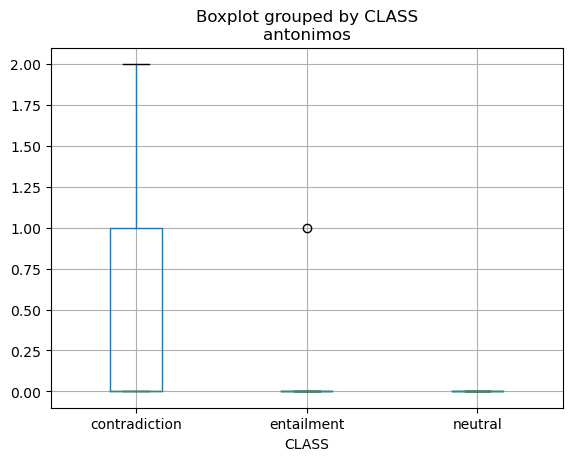

In [151]:
df_sumas.boxplot(by="CLASS",column=["antonimos"])

<AxesSubplot:title={'center':'m_earth'}, xlabel='CLASS'>

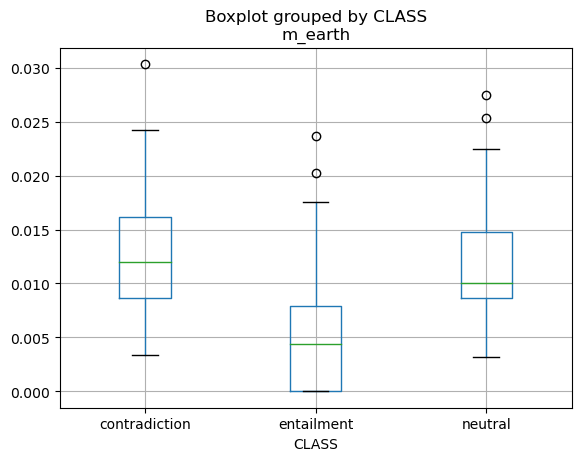

In [145]:
df_sumas.boxplot(by="CLASS",column=["m_earth"])

<AxesSubplot:title={'center':'distancias'}, xlabel='CLASS'>

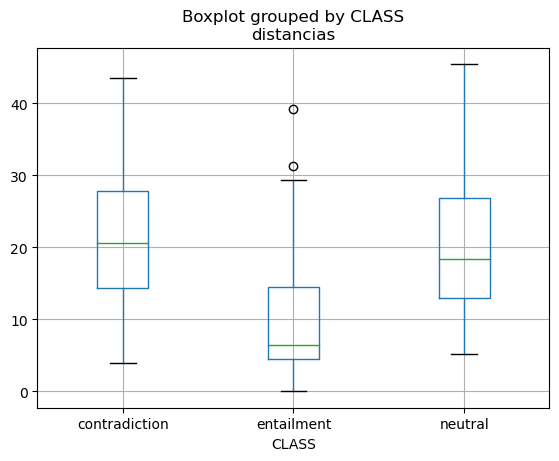

In [146]:
df_sumas.boxplot(by="CLASS",column=["distancias"])

<AxesSubplot:title={'center':'mutual_info'}, xlabel='CLASS'>

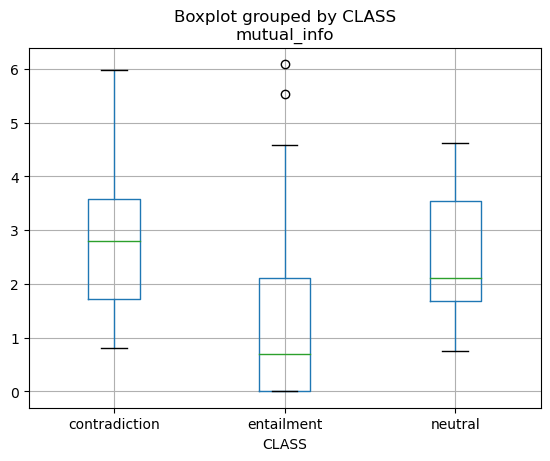

In [147]:
df_sumas.boxplot(by="CLASS",column=["mutual_info"])

<AxesSubplot:title={'center':'suma'}, xlabel='CLASS'>

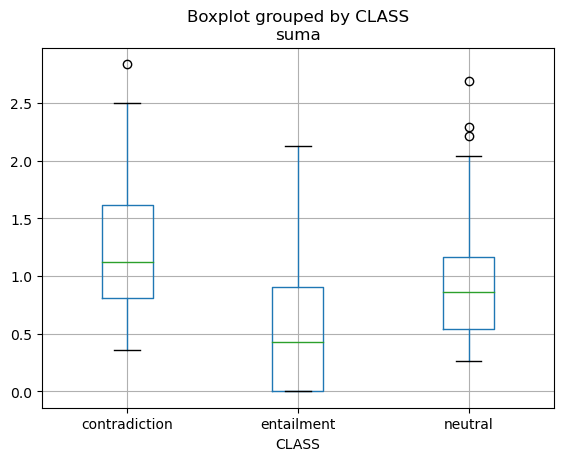

In [148]:
df_sumas.boxplot(by="CLASS",column=["suma"])

<AxesSubplot:title={'center':'entropias'}, xlabel='CLASS'>

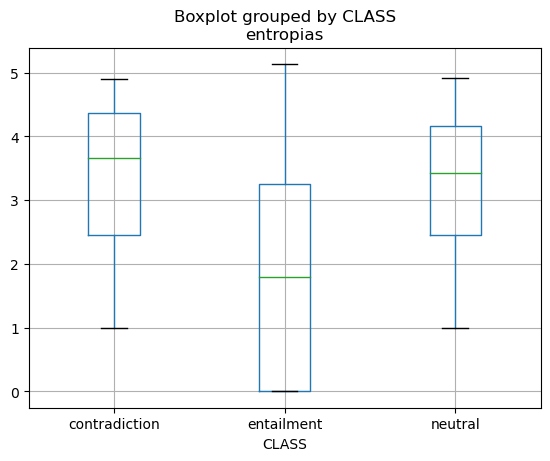

In [149]:
df_sumas.boxplot(by="CLASS",column=["entropias"])

<AxesSubplot:title={'center':'max_info_p'}, xlabel='CLASS'>

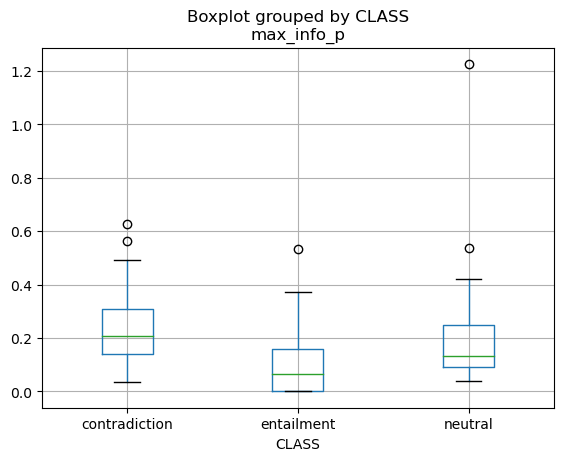

In [150]:
df_sumas.boxplot(by="CLASS",column=["max_info_p"])

# Texto -> Hipótesis, tomando la longitud de la hipótesis en [NOUN,VERB,ADJ,ADV]

In [78]:
maximo=0
columna_v=""
indice_v=""
for c in ma.columns:
    if("VERB" in str(c)):
        for index,strings in ma.iterrows():
            if "VERB" in str(index):
                if maximo<strings[c]:
                    maximo=strings[c]
                    columna_v=c
                    indice_v=index
                #print(ma[c].max(),c,ma[c].idxmax())v
print(maximo, columna_v,indice_v)


0  


In [79]:
ma.quantile(0.25).values

array([0.24844589])

In [89]:
def getRelacionesMA(num,df):
    indices=[]
    todas_relaciones=[]
    todas_relacionest=[]
##### REDUCCIÓN DE MATRIZ DE ALINEAMIENTO
    sumas=[]
    distancias=[]
    entropias=[]
    mearts=[]
    mutinf=[]
    max_info=[]
    texto_2_t=df.at[num,"Text"]
    hipotesis_2_t=df.at[num,"Hipotesis"]
    texto_2=df.at[num,"R_Text"]
    hipotesis_2=df.at[num,"R_Hip"]
    if len(texto_2_t) > 41 and len(hipotesis_2_t) > 41:
        max_t=41
        max_h=41
    elif len(texto_2_t) > 41:
        max_t=41
        max_h=len(hipotesis_2_t)
    elif len(hipotesis_2_t) > 41:
        max_h=41
        max_t=len(texto_2_t)
    else:
        max_t=len(texto_2_t)
        max_h=len(hipotesis_2_t)
    lista_l=[]
    lista_muinfor=[]    
    for i in range(max_t):
        lista=[]
        lista_mu=[]
        for j in range(max_h):
            #lista.append()
            lista.append(wasserstein_distance(texto_2[i],hipotesis_2[j]))
            lista_mu.append(mi.mutual_information_2d(np.array(texto_2[i]),np.array(hipotesis_2[j])))
        lista_l.append(lista)
        lista_muinfor.append(lista_mu)
    meartrh=pd.DataFrame(lista_l[:],index=texto_2_t[:max_t],columns=hipotesis_2_t[:max_h])
    MI_=pd.DataFrame(lista_muinfor[:],index=texto_2_t[:max_t],columns=hipotesis_2_t[:max_h])
    maalign=pd.DataFrame(np.dot(texto_2[:max_t],hipotesis_2[:max_h].T),index=texto_2_t[:max_t],columns=hipotesis_2_t[:max_h])
    col=maalign.columns
    borrar=[]
    indexes=maalign.index
    for c in col:
        if "{null," in str(c) or "{be,VERB" in str(c) or ("NOUN" not in str(c) and "VERB" not in str(c) and "ADJ" not in str(c) and "ADV" not in str(c)):
            borrar.append(c)        
        elif str(c) in indexes:
            borrar.append(c)        
    borrar_i=[]
    for index,strings in maalign.iterrows():
        if "{null," in str(c) or "{be,VERB" in str(index) or ("NOUN" not in str(index) and "VERB" not in str(index) and "ADJ" not in str(index) and "ADV" not in str(index)):
            borrar_i.append(index) 
        elif str(index) in col:
            borrar_i.append(index) 
    maalign=maalign.drop(borrar,axis=1)
    maalign=maalign.drop(borrar_i,axis=0)
    meartrh=meartrh.drop(borrar,axis=1)
    meartrh=meartrh.drop(borrar_i,axis=0)
    MI_=MI_.drop(borrar,axis=1)
    MI_=MI_.drop(borrar_i,axis=0)
    borrar=[]
    borrar_i=[]
    col=maalign.columns
    for index,strings in maalign.iterrows():
        lema_i=str(index).split("{")[1].split(",")[0]
        for c in col:
            if index==c:
                borrar_i.append(index)
                borrar.append(c)
            if strings[c]>=1:
                borrar_i.append(index)
                borrar.append(c)
            lema_c=str(c).split("{")[1].split(",")[0]
            if lema_i == lema_c:
                borrar_i.append(index)
                borrar.append(c)
    maalign=maalign.drop(borrar,axis=1)
    maalign=maalign.drop(borrar_i,axis=0)
    meartrh=meartrh.drop(borrar,axis=1)
    meartrh=meartrh.drop(borrar_i,axis=0)
    MI_=MI_.drop(borrar,axis=1)
    MI_=MI_.drop(borrar_i,axis=0)
    sumas.append(maalign.max().sum())
    max_info.append((maalign.max().sum()/(maalign.shape[0])))
    entropias.append(entropia(maalign.round(2).values.flatten()))
    mearts.append(meartrh.min().sum())
    mutinf.append(MI_.max().sum())
    distancias.append(obtener_distancia(num,dfp))
    encontrar_relaciones(maalign)
    
#####
    #
    
    # distancia_words=obtener_distancia(indice,dfp)/len(c)
    # suma_words=ma.sum().sum()
    # informacion_words=ma.max().sum()

    # maximo=0
    # indice_v=""
    # columna_v=""
    # c=ma.max()
    # for l in range(len(c)):
    #     for index,strings in ma.iterrows():
    #         if("VERB" in str(index)):
    #             if("VERB" in str(ma.columns[l])):
    #                 if maximo<c[l]:
    #                     maximo=c[l]
    #                     columna_v=str(ma.columns[l]).split('\'')[1].split("{")[0]
    #                     indice_v=str(index).split('\'')[1].split("{")[0]
    # print(indice_v,columna_v)
    # #Dirección contraria
    # # mat=ma.transpose()
    # # c1=mat.mean().values #.quantile(corte).values
    # # for index,strings in mat.iterrows():
    # #     for l in range(len(c1)):
    # #         if 'NOUN' in str(index) or 'ADJ' in str(index) or 'PRON' in str(index) or 'ADV' in str(index):                
    # #             if 'NOUN' in str(mat.columns[l]) or 'ADJ' in str(mat.columns[l]) or 'PRON' in str(mat.columns[l]) or 'ADV' in str(mat.columns[l]):
    # #                 if strings[l] >=c1[l]:# >=1:
    # #                     todas_relacionest.append((index,mat.columns[l],strings[l]))
    # labels=["NOUN","ADJ","ADV"]
    # diccionarioTW = {}
    # print(todas_relaciones)
    # for l1 in labels[:]:
    #     for l2 in labels[:]:
    #         diccionarioTW[l1+"_"+l2]=[]
    # for tr in todas_relaciones:
    #     #print(tr[0],"-",tr[1])
    #     t_=str(tr[0]).split(",")
    #     pt=t_[1].split("}")[0]
    #     h_=str(tr[1]).split(",")
    #     #print(t_,h_,"h0",h_[0])
    #     ph=h_[1].split("}")[0]
    #     if pt=="PRON":
    #         pt="NOUN"
    #     if ph=="PRON":
    #         ph="NOUN"
    #     #diccionarioTW[pt+"_"+ph].append(tr[2])
    #     if pt+"_"+ph in diccionarioTW:
    #         diccionarioTW[pt+"_"+ph].append(tr[2])
    # diccionarioTW_mean={}
    # #diccionarioTW_mean_n={}
    # #diccionarioTW_rel={}
    # for k in diccionarioTW:
    #     if len(diccionarioTW[k])!=0:
    #         diccionarioTW_mean[k]=sum(diccionarioTW[k])/len(diccionarioTW[k])
    #         #diccionarioTW_mean_n[k+"_"]=len(diccionarioTW[k])#/ma.shape[0]
    #         #diccionarioTW_rel[k+"_r"]=sum(diccionarioTW[k])/len(diccionarioTW[k])#/ma.shape[0]
    #     else:
    #         diccionarioTW_mean[k]=0
    #         #diccionarioTW_mean_n[k+"_"]=0
    #         #diccionarioTW_rel[k+"_r"]=0
    # return diccionarioTW_mean,todas_relaciones,indice_v,columna_v,distancia_words,suma_words,informacion_words
    # #return diccionarioTW_mean,diccionarioTW_mean_n,todas_relaciones,todas_relacionest,diccionarioTW_rel,indice_v,columna_v,distancia_words,suma_words,informacion_words

In [97]:
getRelacionesMA(42,df)

/tmp/ipykernel_66225/781148394.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return round(np.sum(-p * np.log2(p) for p in probs), 3)


buscar en conceptnet null perfectly
buscar en conceptnet null free
buscar en conceptnet play perfectly
buscar en conceptnet play free
buscar en conceptnet rugby perfectly
buscar en conceptnet rugby free
buscar en conceptnet cover perfectly
buscar en conceptnet cover free
Columnas macheadas []
Columnas macheadas []
Antonimos []


# Lectura de los 100 pares de T y H (muestreo)

In [93]:
prueba=pd.read_csv("data/prueba.csv")

In [43]:
textos = prueba["sentence1"].to_list()
hipotesis = prueba["sentence2"].to_list()
print(textos)
print(hipotesis)

['A man wearing a blue shirt, black apron, eyeglasses, and a mask is handling food in a tray.', 'A man dressed in a red shirt and black tie stands up at a wedding reception to make a speech.', 'A young boy runs across a road in front of a sky blue building with barred windows.', 'An Asian woman is standing on a path with a basket on her head looking into a mirror she is holding in her hand.', 'A child in a maroon shirt playing next to a fountain.', 'man dressed in orange clothing with face covered seemingly balancing on a cane being held be a similarly dressed man sitting crossed legged on the ground at a shopping mall.', 'An old man with a package poses in front of an advertisement.', 'People dressed in traditional Japanese garb walk in a procession through a courtyard paved with paving stones.', 'Two children play in the snow by the side of the road.', 'Blond-haired girl wearing a bicycle helmet, a black t-shirt that reads "Twizzlers" and a printed dog tag necklace around her neck.',

In [44]:
hipotesis[28]

'People near a lot of reading materials.'

In [45]:
textos[28]

'Man and a woman at the side of a table covered in books.'

In [46]:
import nltk, re, os
from nltk.corpus import wordnet as wn
import networkx as nx
from matplotlib import pyplot as plt


# Antonimia e hiponimia

In [198]:
def revision_ant_hipo(relaciones_alineadas,wn):
    sinonimos_words=[]
    antonimos_words=[]
    hyperonyms_words=[]
    hyponyms_words=[]
    relaciones_fuertes=[]
    synonyms=[]
    antonyms=[]
    is_a=[]
    verbos=[]
    for r_a in relaciones_alineadas[:]:
        sim=0
        pal_sim_a=""
        pal_sim_b=""
        print(r_a[0],"a",r_a[1])
        word_t = str(r_a[0]).split('\'')[1]
        wt = word_t.split('{')[0]
        lt = word_t.split('}')[0].split(',')[0].split('{')[1]
        #print(word_t)
        #print(word_t.split('}')[0].split(','))
        if len(word_t.split('}')[0].split(','))==2:
            pt = word_t.split('}')[0].split(',')[1]
        else:
            pt=""
        #print(pt)
        w_in_text= wt + "," + pt
        #print(wt,lt,pt)
        word_h = str(r_a[1]).split('\'')[1]
        wh = word_h.split('{')[0] #palabra tal cual
        lh = word_h.split('}')[0].split(',')[0].split('{')[1] #palabra lematizada
        #print(word_h)
        if len(word_h.split('}')[0].split(','))==2:
            ph = word_h.split('}')[0].split(',')[1] # pos de la palabra
        else:
            ph=""
        #print(ph)
        word = wh + "," + ph # palabra con el pos correspondiente
        #print(wh,lh,ph)
        
        #BUSCAR EN CONCEPTNET 5.7
        bandera_concept=0
        try:
            print("buscar en conceptnet",wt,wh)
            for e in edges_for(Label.get(text=wh, language='en').concepts, same_language=True):
                if "synonym"==e.relation.name:
                    if wh== e.start.text:
                        if e.end.text==wt:
                            print("sinonimos conceptnet",wh,wt)
                            synonyms.append(wt)
                            relaciones_fuertes.append((wt,wh,wt,wh,1,0))
                            bandera_concept=1
                            break
                    else:
                        if e.start.text==wt:
                            print("sinonimos conceptnet",wh,wt)
                            synonyms.append(wt)
                            relaciones_fuertes.append((wt,wh,wt,wh,1,0))
                            bandera_concept=1
                            break
                elif "antonym" ==e.relation.name:
                    if wh== e.start.text:
                        if e.end.text==wt:
                            print("antonimos conceptnet",wh,wt)
                            bandera_concept=1
                            antonyms.append(wt)
                            break
                elif "is_a" ==e.relation.name:
                    if wh== e.start.text:
                        if e.end.text==wt:
                            print("is a  conceptnet",wh,wt)
                            bandera_concept=1
                            relaciones_fuertes.append((wt,wh,wt,wh,1,0))
                            is_a.append(wt)
                            break
                    else:
                        if e.start.text==wt:
                            print("isa  conceptnet",wh,wt)
                            bandera_concept=1
                            relaciones_fuertes.append((wt,wh,wt,wh,1,0))
                            is_a.append(wt)
                            break
        except:
            print("no esta en conceptnet:",wh)

        #Si no hay relaciones de sinonimia o hiperonimia entonces buscamos relaciones en wordnet la maxima que tenga para despues
        # procesarlos con algunas medidas
        if bandera_concept==0:
            # buscamos medidas de las relaciones alineadas a traves de wordnet
            if pt == "NOUN" or pt=="PRON":
                w1_=wn.synsets(wt,wn.NOUN)
            elif pt == "VERB":
                w1_=wn.synsets(wt,wn.VERB)
            elif pt == "ADJ":
                w1_=wn.synsets(wt,wn.ADJ)
            elif pt == "ADV":
                w1_=wn.synsets(wt,wn.ADV)
            else:
                w1_=wn.synsets(wt)
            if ph == "NOUN" or ph=="PRON":
                w2_=wn.synsets(wh,wn.NOUN)
            elif ph == "VERB":
                w2_=wn.synsets(wh,wn.VERB)
            elif ph == "ADJ":
                w2_=wn.synsets(wh,wn.ADJ)
            elif ph == "ADV":
                w2_=wn.synsets(wh,wn.ADV)
            else:
                w2_=wn.synsets(wh)
            w1_=wn.synsets(wt)
            w2_=wn.synsets(wh)
            for a in w1_:
                for b in w2_:         
                    if a.wup_similarity(b)>sim:
                        sim=a.wup_similarity(b)
                        pal_sim_a=a
                        pal_sim_b=b
            # SI TENEMOS MISMOS POS ENTONCES NECESITAMOS QUE CUMPLAN LO SIGUIENTE:
            # SIM != 0Y MAYOR QUE 0.5, DISTANCIA MENOR QUE 4
            if pt==ph:
                if pt=="VERB":
                    verbos.append((wt,wh,sim))
                if sim!=0:
                    print("wup_sim:","Palabra1: ",pal_sim_a,"Palabra2:",pal_sim_b,sim)
                    if pal_sim_a.path_similarity(pal_sim_b, simulate_root=False)!=None:
                        print("path_sim:","Palabra1: ",pal_sim_a,"Palabra2:",pal_sim_b,pal_sim_a.path_similarity(pal_sim_b, simulate_root=False))
                    if pal_sim_a.shortest_path_distance(pal_sim_b)!=None:
                        print("spath:","Palabra1: ",pal_sim_a,"Palabra2:",pal_sim_b,pal_sim_a.shortest_path_distance(pal_sim_b))
                    if pal_sim_a.pos()==pal_sim_b.pos():
                        print("lch:","Palabra1: ",pal_sim_a,"Palabra2:",pal_sim_b,pal_sim_a.lch_similarity(pal_sim_b))
                    
                    #relaciones fuertes combinando las medidas de wordnet
                    #wup nos ayuda a filtrar que tan similares son
                    #distancia más corta nos ayuda a identificar que no se encuentren muy lejos en el arbol de wordnet
                    #lch similarity ayuda a identificar que en la taxonomia no se encunetren alejados, para los que
                    #tienen unj hiperonimo en comun

                    if sim>=0.5:
                        if pal_sim_a.shortest_path_distance(pal_sim_b)!=None:
                            if pal_sim_a.shortest_path_distance(pal_sim_b)<4:
                                #if pal_sim_a.pos()==pal_sim_b.pos():
                                    #print(pal_sim_a,pal_sim_b,pal_sim_a.lch_similarity(pal_sim_b))
                                    #if pal_sim_a.lch_similarity(pal_sim_b)<2:
                                relaciones_fuertes.append((wt,wh,pal_sim_a,pal_sim_b,sim,pal_sim_a.shortest_path_distance(pal_sim_b)))
                                    
                    #else:
                    #    relaciones_debiles.append((pal_sim_a,pal_sim_b,-sim))
                    #Busqueda de relaciones de sinonimia y antonimia
                    #synonymsW=[]
                    #antonymsW=[]   
                    #for l in pal_sim_a.lemmas():
                    #    synonymsW.append(l.name())
                    #if wh in synonyms:
                    #    print("Sinonimo: ",wt,wh)
                    #    sinonimos_words.append((wt,wh))
                    #    relaciones_fuertes.append((wt,wh,pal_sim_a,pal_sim_b,sim,pal_sim_a.shortest_path_distance(pal_sim_b)))
                    #Busqueda de relaciones de hiperonimia e hiponimia
                    # hyperonyms=pal_sim_a.hypernym_paths()
                    # for p in hyperonyms:
                    #     if pal_sim_b in p:
                    #         if(pal_sim_a.shortest_path_distance(pal_sim_b)!=0):
                    #             print("hiperonimo:",pal_sim_a,pal_sim_b,pal_sim_a.shortest_path_distance(pal_sim_b))
                    #             hyperonyms_words.append((wt,wh))
                    #             relaciones_fuertes.append((wt,wh,pal_sim_a,pal_sim_b,sim,pal_sim_a.shortest_path_distance(pal_sim_b)))
                    #         else:
                    #             sinonimos_words.append((wt,wh))
                    #             relaciones_fuertes.append((wt,wh,pal_sim_a,pal_sim_b,sim,pal_sim_a.shortest_path_distance(pal_sim_b)))
                    # hyponyms=pal_sim_b.hypernym_paths()
                    # for p in hyponyms:
                    #     if pal_sim_a in p:
                    #         if pal_sim_a.shortest_path_distance(pal_sim_b)!=0:
                    #             print("Hiponimo:",pal_sim_a,pal_sim_b,pal_sim_b.shortest_path_distance(pal_sim_a))
                    #             hyponyms_words.append((wt,wh))
                    # for lh in pal_sim_a.lowest_common_hypernyms(pal_sim_b):
                    #     print("minimos hyper",lh)
                    #     print("a->H",pal_sim_a.shortest_path_distance(lh))
                    #     if pal_sim_a.shortest_path_distance(lh)==1:
                    #         relaciones_fuertes.append((wt,wh,pal_sim_a,pal_sim_b,sim,pal_sim_a.shortest_path_distance(pal_sim_b)))
                    #     print("b->H",pal_sim_b.shortest_path_distance(lh))
                    #     if pal_sim_b.shortest_path_distance(lh)==1:
                    #         relaciones_fuertes.append((wt,wh,pal_sim_a,pal_sim_b,sim,pal_sim_a.shortest_path_distance(pal_sim_b)))
                    # print()
            elif ph=="ADJ":
                if sim>=0.3:
                    relaciones_fuertes.append((wt,wh,pal_sim_a,pal_sim_b,sim,pal_sim_a.shortest_path_distance(pal_sim_b)))
    print("sinonimos",len(set(sinonimos_words)),sinonimos_words)
    print("antonimos",len(set(antonimos_words)),antonimos_words)
    print("hyperonyms",len(set(hyperonyms_words)),hyperonyms_words)
    print("hyponyms",len(set(hyponyms_words)),hyponyms_words)
    print("relaciones alineadas",relaciones_alineadas)
    print("relaciones fuertes:",relaciones_fuertes)
    tokens_h=[]
    for rl in relaciones_fuertes:
        tokens_h.append(rl[1])
    tokens_h=list(set(tokens_h))
    #sumaf=[]
    # for rl in relaciones_fuertes:
    #     sumaf.append(rl[4])
    # #print("relaciones debiles:",relaciones_debiles)
    # print("verbos: ",verbos)
    # maxv=0
    # for v in verbos:
    #     print(v)
    #     if(float(v[2])>=maxv):
    #         maxv=v[2]
    #         v1=v[0]
    #         v2=v[1]
    # #print(v1,v2)  
    # if len(sumaf)==0:
    #     sum_as=0
    # else:
    #     sum_as=sum(sumaf)/len(sumaf)
    #return [len(set(sinonimos_words)),len(set(antonimos_words)),len(set(hyperonyms_words)),len(set(hyponyms_words)),sum_as],tokens_h
    return [len(set(synonyms))+len(set(sinonimos_words)),len(set(antonyms)),len(set(is_a))+len(set(hyperonyms_words))],relaciones_fuertes,tokens_h

In [157]:
# import spacy

# nlp = spacy.load("en_core_web_md")
# doc = nlp("A man is not dressed in orange clothing seemingly balancing on a cane being held be a similarly dressed man sitting crossed legged on the ground at a shopping mall")

# for token in doc:
#     print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
#             token.shape_, token.is_alpha, token.is_stop)
#     if token.dep_=="ROOT":
#         r=token.text
# print(r)

In [49]:
#import spacy
#from spacy import displacy

# nlp = spacy.load("en_core_web_md")
# doc = nlp("A man is not dressed in orange clothing seemingly balancing on a cane being held be a similarly dressed man sitting crossed legged on the ground at a shopping mall")
# displacy.serve(doc, style="dep")

In [158]:
# nlp = spacy.load("en_core_web_md")  # make sure to use larger package!
# doc1 = nlp("An old man runs in front of an advertisement.")
# doc2 = nlp("A man sleeps in front of an ad for beer.")
# for token in doc1:
#     print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
#             token.shape_, token.is_alpha, token.is_stop)
#     if token.dep_=="ROOT":
#         r_t=token
# print(r_t)
# for token in doc2:
#     #print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
#     #        token.shape_, token.is_alpha, token.is_stop)
#     if token.dep_=="ROOT":
#         r_h=token
# print(r_h)
# # Similarity of two documents
# print(doc1, "<->", doc2, doc1.similarity(doc2))
# # Similarity of tokens and spans
# french_fries = r_t
# burgers = r_h
# print(french_fries, "<->", burgers, french_fries.similarity(burgers))

In [51]:
from sentence_transformers import SentenceTransformer, util, InputExample, losses
#Load the model(here we use minilm)
model = SentenceTransformer('all-MiniLM-L6-v2')
#We get the embeddings by calling model.encode()

2023-11-22 08:52:03.710163: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


# prueba

In [ ]:
import spacy
nlp = spacy.load("en_core_web_md")

In [197]:
features=[]
length=len(textos)
for i in range(length):
#length=[0,1,2,3,4]
#for i in length:
    print(i)
    print("Texto: ",textos[i])
    print("Hipótesis: ",hipotesis[i])
    #todas_relaciones,todos_conteos,relaciones_alineadas,relaciones_alineadast,relatip_num,tverb,hverb,a_m,b_m,c_m=getRelacionesMA_corte(i,df,dfp)
    todas_relaciones,relaciones_alineadas,tverb,hverb,distancia_words,suma_words,informacion_words=getRelacionesMA_corte(i,df,dfp)
    doc1 = nlp(textos[i])
    for token in doc1:
        if token.text==tverb:
            r_t=token
    doc2 = nlp(hipotesis[i])
    for token in doc2:
        if token.text==hverb:
            r_h=token
    #print(todas_relaciones)
    #print("Relaciones",len(relaciones_alineadas),len(relaciones_alineadast))
    rel_semanticas,relaciones_fuertes,tokens_h=revision_ant_hipo(relaciones_alineadas,wn)
    #print("semanticas",rel_semanticas)
    #print("tkh",list(set(tokens_h)))
    doc2 = nlp(hipotesis[i].lower())
    faltan=[]
    print("tokens hipotesis:",tokens_h)
    for token in doc2:
        if token.pos_ in ["NOUN","ADV","VERB","PRON","PRONP","ADJ"]:
            if token.text not in tokens_h:
                faltan.append(token.text)
    print("faltantes h:",faltan)
    print()
    print()
    #print("verbos a comparar",tverb,hverb)
    # if (len(faltan)==0):
    #     lab="entailment"
    # else:
    #     lab="contradiction"
    #features.append(list(todas_relaciones.values())+list(todos_conteos.values())+rel_semanticas+[r_h.similarity(r_t),len(faltan),a_m,b_m,c_m])
    features.append(list(todas_relaciones.values())+relaciones_fuertes+rel_semanticas+[r_h.similarity(r_t),distancia_words,suma_words,informacion_words])

0
Texto:  A man wearing a blue shirt, black apron, eyeglasses, and a mask is handling food in a tray.
Hipótesis:  A person in appropriate institution protection works with meals.
wearing works
[(('man{man,NOUN}',), ('person{person,NOUN}',), 0.55571747), (('man{man,NOUN}',), ('institution{institution,NOUN}',), 0.23045684), (('wearing{wear,VERB}',), ('person{person,NOUN}',), 0.3349651), (('wearing{wear,VERB}',), ('appropriate{appropriate,ADJ}',), 0.26200303), (('wearing{wear,VERB}',), ('institution{institution,NOUN}',), 0.10991094), (('wearing{wear,VERB}',), ('protection{protection,NOUN}',), 0.24207604), (('black{black,ADJ}',), ('institution{institution,NOUN}',), 0.10247349), (('mask{mask,NOUN}',), ('person{person,NOUN}',), 0.2593783), (('mask{mask,NOUN}',), ('appropriate{appropriate,ADJ}',), 0.2833925), (('mask{mask,NOUN}',), ('protection{protection,NOUN}',), 0.29310957), (('handling{handle,VERB}',), ('person{person,NOUN}',), 0.29983187), (('handling{handle,VERB}',), ('appropriate{appro

In [54]:
#doc1 = nlp("A fat woman wearing faint blue top is blowing soap bubble")
#doc2 = nlp("A fat woman is wearing pants")
#for token in doc1:
#    for token1 in doc2:
#        print(token.text,token1.text,token.similarity(token1))

In [174]:
#df1 = pd.DataFrame(features, columns=list(todas_relaciones)+list(todos_conteos)+["sinonimos","antonimos","hiperonimos","hiponimos","action_wn","faltan","faltan2","a_m","b_m","c_m"])#,"similaridad_1_2","dif"])
df1 = pd.DataFrame(features, columns=list(todas_relaciones)+["sinonimos","antonimos","is_a","action_sim_nlp","distancia_euc","suma_info","suma_max_simi"])#,"similaridad_1_2","dif"])
df1

,NOUN_NOUN,NOUN_ADJ,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_ADV,ADV_NOUN,ADV_ADJ,ADV_ADV,sinonimos,antonimos,is_a,action_sim_nlp,distancia_euc,suma_info,suma_max_simi
0,0.336712,0.303363,0.000000,0.102473,0.000000,0.000000,0.000000,0.0,0.0,0,0,1,0.272841,6.524279,13.284535,2.697227
1,0.609988,0.472324,0.000000,0.424633,0.869893,0.000000,0.000000,0.0,0.0,5,0,2,0.159916,2.310604,23.873234,4.924438
2,0.404836,0.409299,0.000000,0.406516,0.440236,0.000000,0.000000,0.0,0.0,2,0,0,0.256307,5.360355,11.503313,2.209444
3,0.418081,0.000000,0.000000,0.385873,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,1.000000,2.845385,9.888334,1.457576
4,0.646680,0.000000,0.000000,0.000000,0.000000,0.000000,0.323928,0.0,0.0,2,0,0,0.465413,3.080132,7.184703,2.859084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.425643,0.412827,0.455184,0.362079,0.504415,0.000000,0.000000,0.0,0.0,0,0,1,0.110635,4.883518,19.256735,3.609311
96,1.000000,0.000000,0.000000,0.768382,0.000000,0.000000,0.000000,0.0,0.0,2,0,1,0.652412,4.656574,6.084509,2.664728
97,0.355083,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,0.467361,6.902841,3.825182,1.006833
98,0.658487,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,0.479299,4.725261,3.457137,1.828981


In [175]:
gold_label=prueba.gold_label.values
gold_label

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [176]:
df1["CLASS"]=gold_label
df1

,NOUN_NOUN,NOUN_ADJ,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_ADV,ADV_NOUN,ADV_ADJ,ADV_ADV,sinonimos,antonimos,is_a,action_sim_nlp,distancia_euc,suma_info,suma_max_simi,CLASS
0,0.336712,0.303363,0.000000,0.102473,0.000000,0.000000,0.000000,0.0,0.0,0,0,1,0.272841,6.524279,13.284535,2.697227,entailment
1,0.609988,0.472324,0.000000,0.424633,0.869893,0.000000,0.000000,0.0,0.0,5,0,2,0.159916,2.310604,23.873234,4.924438,entailment
2,0.404836,0.409299,0.000000,0.406516,0.440236,0.000000,0.000000,0.0,0.0,2,0,0,0.256307,5.360355,11.503313,2.209444,contradiction
3,0.418081,0.000000,0.000000,0.385873,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,1.000000,2.845385,9.888334,1.457576,contradiction
4,0.646680,0.000000,0.000000,0.000000,0.000000,0.000000,0.323928,0.0,0.0,2,0,0,0.465413,3.080132,7.184703,2.859084,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.425643,0.412827,0.455184,0.362079,0.504415,0.000000,0.000000,0.0,0.0,0,0,1,0.110635,4.883518,19.256735,3.609311,entailment
96,1.000000,0.000000,0.000000,0.768382,0.000000,0.000000,0.000000,0.0,0.0,2,0,1,0.652412,4.656574,6.084509,2.664728,entailment
97,0.355083,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,0.467361,6.902841,3.825182,1.006833,contradiction
98,0.658487,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,0.479299,4.725261,3.457137,1.828981,contradiction


In [177]:
df1.to_csv("salida/TipoPalabra_conteos_umbral_mean_relsemanf_root_difTH_porcentajeR_MAsmaxM.csv",index=False)

In [59]:
df1.columns

Index(['NOUN_NOUN', 'NOUN_ADJ', 'NOUN_VERB', 'NOUN_ADV', 'ADJ_NOUN', 'ADJ_ADJ',
       'ADJ_VERB', 'ADJ_ADV', 'VERB_NOUN', 'VERB_ADJ', 'VERB_VERB', 'VERB_ADV',
       'ADV_NOUN', 'ADV_ADJ', 'ADV_VERB', 'ADV_ADV', 'NOUN_NOUN_', 'NOUN_ADJ_',
       'NOUN_VERB_', 'NOUN_ADV_', 'ADJ_NOUN_', 'ADJ_ADJ_', 'ADJ_VERB_',
       'ADJ_ADV_', 'VERB_NOUN_', 'VERB_ADJ_', 'VERB_VERB_', 'VERB_ADV_',
       'ADV_NOUN_', 'ADV_ADJ_', 'ADV_VERB_', 'ADV_ADV_', 'sinonimos',
       'antonimos', 'hiperonimos', 'hiponimos', 'action_wn', 'faltan',
       'faltan2', 'CLASS'],
      dtype='object')

In [ ]:
a=list(todas_relaciones)
a

['NOUN_NOUN',
 'NOUN_ADJ',
 'NOUN_VERB',
 'NOUN_ADV',
 'ADJ_NOUN',
 'ADJ_ADJ',
 'ADJ_VERB',
 'ADJ_ADV',
 'VERB_NOUN',
 'VERB_ADJ',
 'VERB_VERB',
 'VERB_ADV',
 'ADV_NOUN',
 'ADV_ADJ',
 'ADV_VERB',
 'ADV_ADV']